# Final Project - ISP Churn Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Loading the dataset

data = pd.read_csv('../data/cleaned/data.csv')
full_data = pd.read_csv('../data/cleaned/full_data.csv')
data['satisfaction_score'] = data['satisfaction_score'].astype('object')
full_data['satisfaction_score'] = data['satisfaction_score'].astype('object')

In [3]:
# Initial Exploration

data.head()

,gender,senior_citizen,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,total_charges,churn_value,cltv,under_30,married,number_of_dependents,satisfaction_score,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,premium_tech_support,streaming_music,unlimited_data,monthly_charge,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,Male,No,No,Yes,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,1,3239,No,No,0,1,No,0,2,10.47,DSL,21,No,No,Yes,53.85,0.0,0,20.94,129.09
1,Female,No,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,1,2701,Yes,No,2,2,No,0,2,9.12,Fiber Optic,51,No,No,Yes,70.70,0.0,0,18.24,169.89
2,Female,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,820.50,1,5372,No,No,2,3,No,0,8,12.15,Cable,26,No,Yes,Yes,99.65,0.0,0,97.20,917.70
3,Female,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,1,5003,Yes,Yes,3,3,No,0,28,4.89,Fiber Optic,47,Yes,Yes,Yes,104.80,0.0,0,136.92,3182.97
4,Male,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.30,1,5340,No,No,1,1,No,0,49,44.33,Fiber Optic,11,No,Yes,Yes,103.70,0.0,0,2172.17,7208.47


In [4]:
data = pd.DataFrame(data)

In [5]:
data.columns

Index(['gender', 'senior_citizen', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'streaming_tv', 'streaming_movies', 'contract',
       'paperless_billing', 'payment_method', 'total_charges', 'churn_value',
       'cltv', 'under_30', 'married', 'number_of_dependents',
       'satisfaction_score', 'referred_a_friend', 'number_of_referrals',
       'tenure_in_months', 'avg_monthly_long_distance_charges',
       'internet_type', 'avg_monthly_gb_download', 'premium_tech_support',
       'streaming_music', 'unlimited_data', 'monthly_charge', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue'],
      dtype='object')

### Separating Data - Between Numerical and Categorical

In [6]:
def separate_data(df: pd.DataFrame) -> pd.DataFrame:
    
    '''Separates the input DataFrame into nunmerical and categorical dataframes'''
    
    numericals = df.select_dtypes(np.number)
    categoricals = df.select_dtypes(['object'])
    
    return numericals,  categoricals

In [7]:
numerical, categorical = separate_data(data)

In [8]:
numerical.head()

,total_charges,churn_value,cltv,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,108.15,1,3239,0,0,2,10.47,21,53.85,0.0,0,20.94,129.09
1,151.65,1,2701,2,0,2,9.12,51,70.70,0.0,0,18.24,169.89
2,820.50,1,5372,2,0,8,12.15,26,99.65,0.0,0,97.20,917.70
3,3046.05,1,5003,3,0,28,4.89,47,104.80,0.0,0,136.92,3182.97
4,5036.30,1,5340,1,0,49,44.33,11,103.70,0.0,0,2172.17,7208.47


In [9]:
categorical.head()

,gender,senior_citizen,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,under_30,married,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,streaming_music,unlimited_data
0,Male,No,No,Yes,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,No,No,1,No,DSL,No,No,Yes
1,Female,No,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,2,No,Fiber Optic,No,No,Yes
2,Female,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,No,No,3,No,Cable,No,Yes,Yes
3,Female,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Yes,3,No,Fiber Optic,Yes,Yes,Yes
4,Male,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),No,No,1,No,Fiber Optic,No,Yes,Yes


## Plotting Numerical and Categoricals

### Plotting Churn

In [10]:
def barplot(df, column_label, figsize=(4, 3), font_size=10):
    # Calculate the count and percentage of each unique value in the specified column
    value_counts = df[column_label].value_counts()
    percentage_counts = value_counts / len(df) * 100

    # Plot the bar graph
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=value_counts.index, y=value_counts.values)

    # Add labels and title
    ax.set_xlabel(column_label)
    ax.set_ylabel('Count / Percentage')
    ax.set_title(f'Count and Percentage of {column_label}')

    # Add text annotations inside the bars with both count and percentage
    for i, (p, percentage) in enumerate(zip(ax.patches, percentage_counts)):
        count = value_counts.iloc[i]
        ax.annotate(f'{count}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', color='white', fontsize=font_size, weight='bold')

    plt.show()


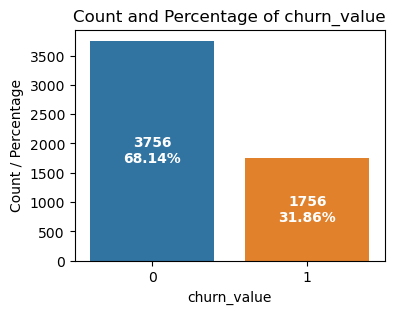

In [11]:
barplot(numerical,'churn_value')

* 32% of our userbase churned this last Q. That's an alarming number, if the trend continues the userbase will be fully churned within 2 more Q (not considering new customers). This is a really big number for churn.

#### Analysis by City

In [111]:
# Calculate churn rate and count for each city
by_city = full_data.groupby('city')['churn_value'].agg(churn_value='sum', count='count').reset_index()

# Calculate churn rate as the sum of 'churn_value' divided by the count
by_city['churn_rate'] = by_city['churn_value'] / by_city['count']

# Resetting the index to have a DataFrame
by_city = by_city.reset_index().sort_values(by='churn_value', ascending=False)
by_city.head(20)

,index,city,churn_value,count,churn_rate
561,561,Los Angeles,86,236,0.364407
868,868,San Diego,45,130,0.346154
871,871,San Francisco,30,74,0.405405
877,877,San Jose,28,94,0.297872
854,854,Sacramento,23,79,0.291139
354,354,Fresno,15,51,0.294118
555,555,Long Beach,14,48,0.291667
701,701,Oakland,13,41,0.317073
970,970,Stockton,11,34,0.323529
631,631,Modesto,11,23,0.478261


### Numerical

In [15]:
# Defining function to create histograms of all the numerical columns

def make_histograms_cols(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx], color=sns.color_palette("muted")[0]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()

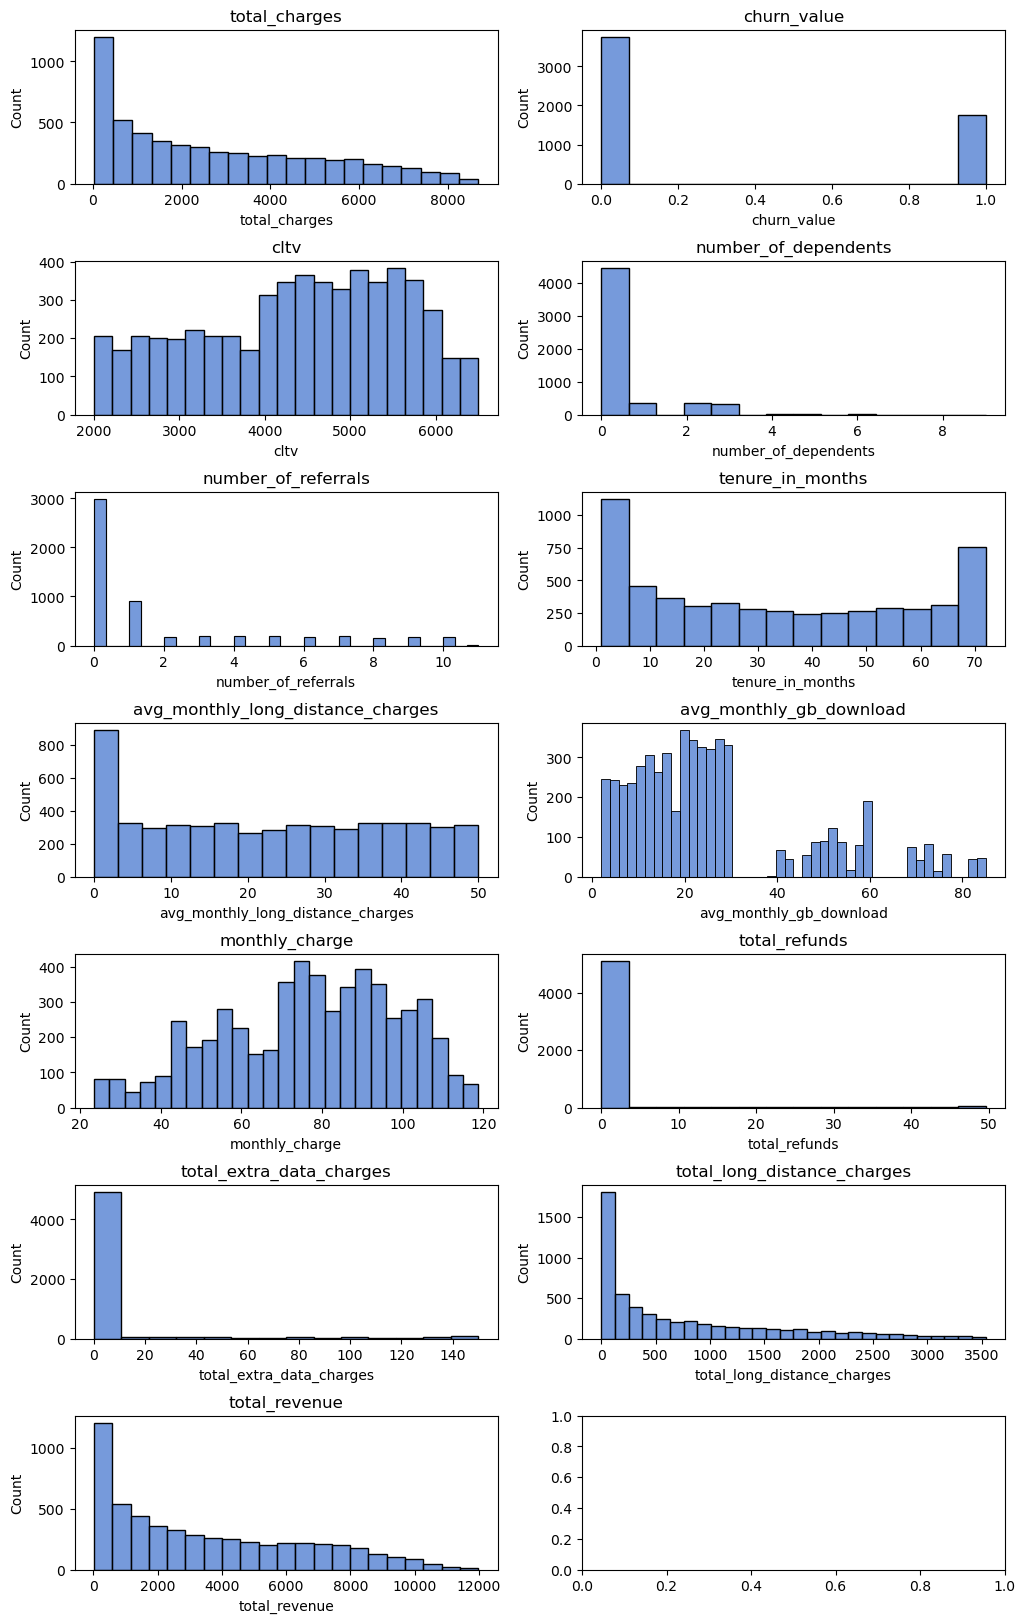

In [16]:
make_histograms_cols(numerical, figsize=(12, 20))

In [17]:
# After seeing the distributions we can discard the columns total_extra_data_charges and total_refunds as they doesn't provides us with interesting data for the model

numerical = numerical.drop('total_extra_data_charges', axis=1)
numerical = numerical.drop('total_refunds', axis=1)

In [18]:
def make_boxplot(df, churn_column='churn_value', palette='viridis'):
    cols = df.select_dtypes(include='number').columns
    num_cols = len(cols)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    for i, col in enumerate(cols):
        row_index = i // 3
        col_index = i % 3

        ax = axes[row_index, col_index]
        sns.boxplot(data=df, x=churn_column, y=col, palette=palette, ax=ax)
        ax.set_xlabel('Churn')
        ax.set_ylabel(None)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='left', weight='bold')

    # Remove empty subplots if any
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows
    plt.tight_layout()
    plt.show()

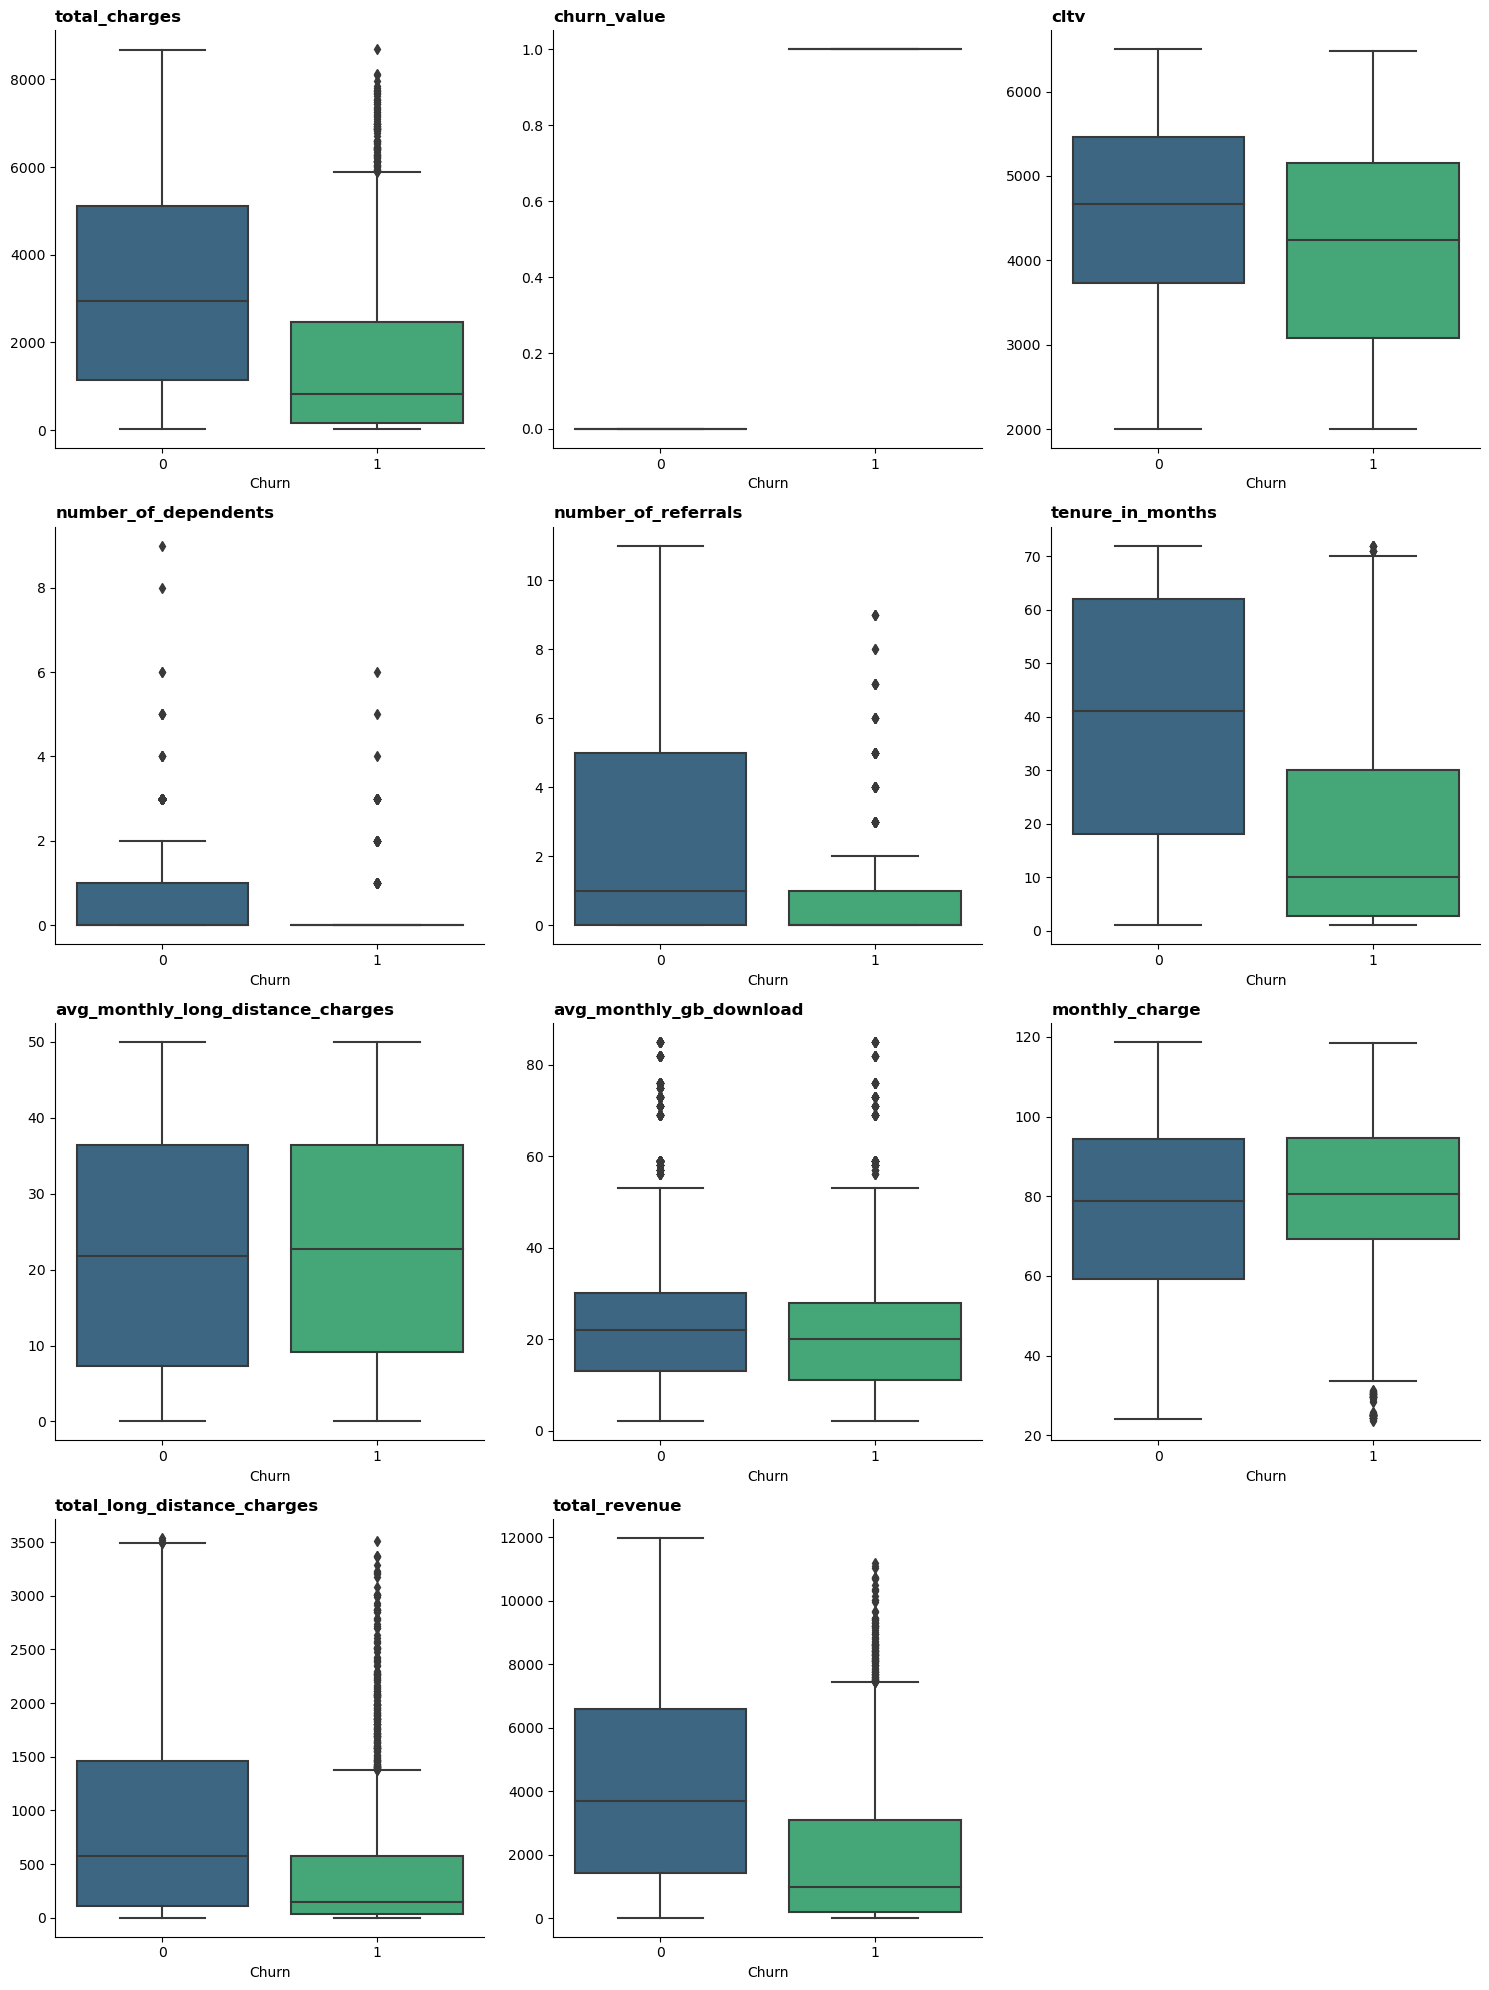

In [19]:
make_boxplot(numerical)

Plotting the numericals against churn gives us some insight about users behavior 

* Customers with lower CLTV (Customer Lifetime Value) are more likely to churn than with higer CLTV
* Customers who didn't referred the product where where much more likely to churn than the ones who referred it
* The median tenure for customers who churned was around 10 vs 41 of the ones that didn't
* Regarding avg_monthly_distance_charges, there are no differences between the two groups
* The same applies to the gb_download, although the customers that didn't churn have a slightly higher median (boxplot overall)
* As for the monthly_charges, customers that churned tend to have been charged more for the first 25%

### Categorical

In [20]:
# Defining function to plot countplots

def make_countplots(df: pd.DataFrame, figsize=(12, 25)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()

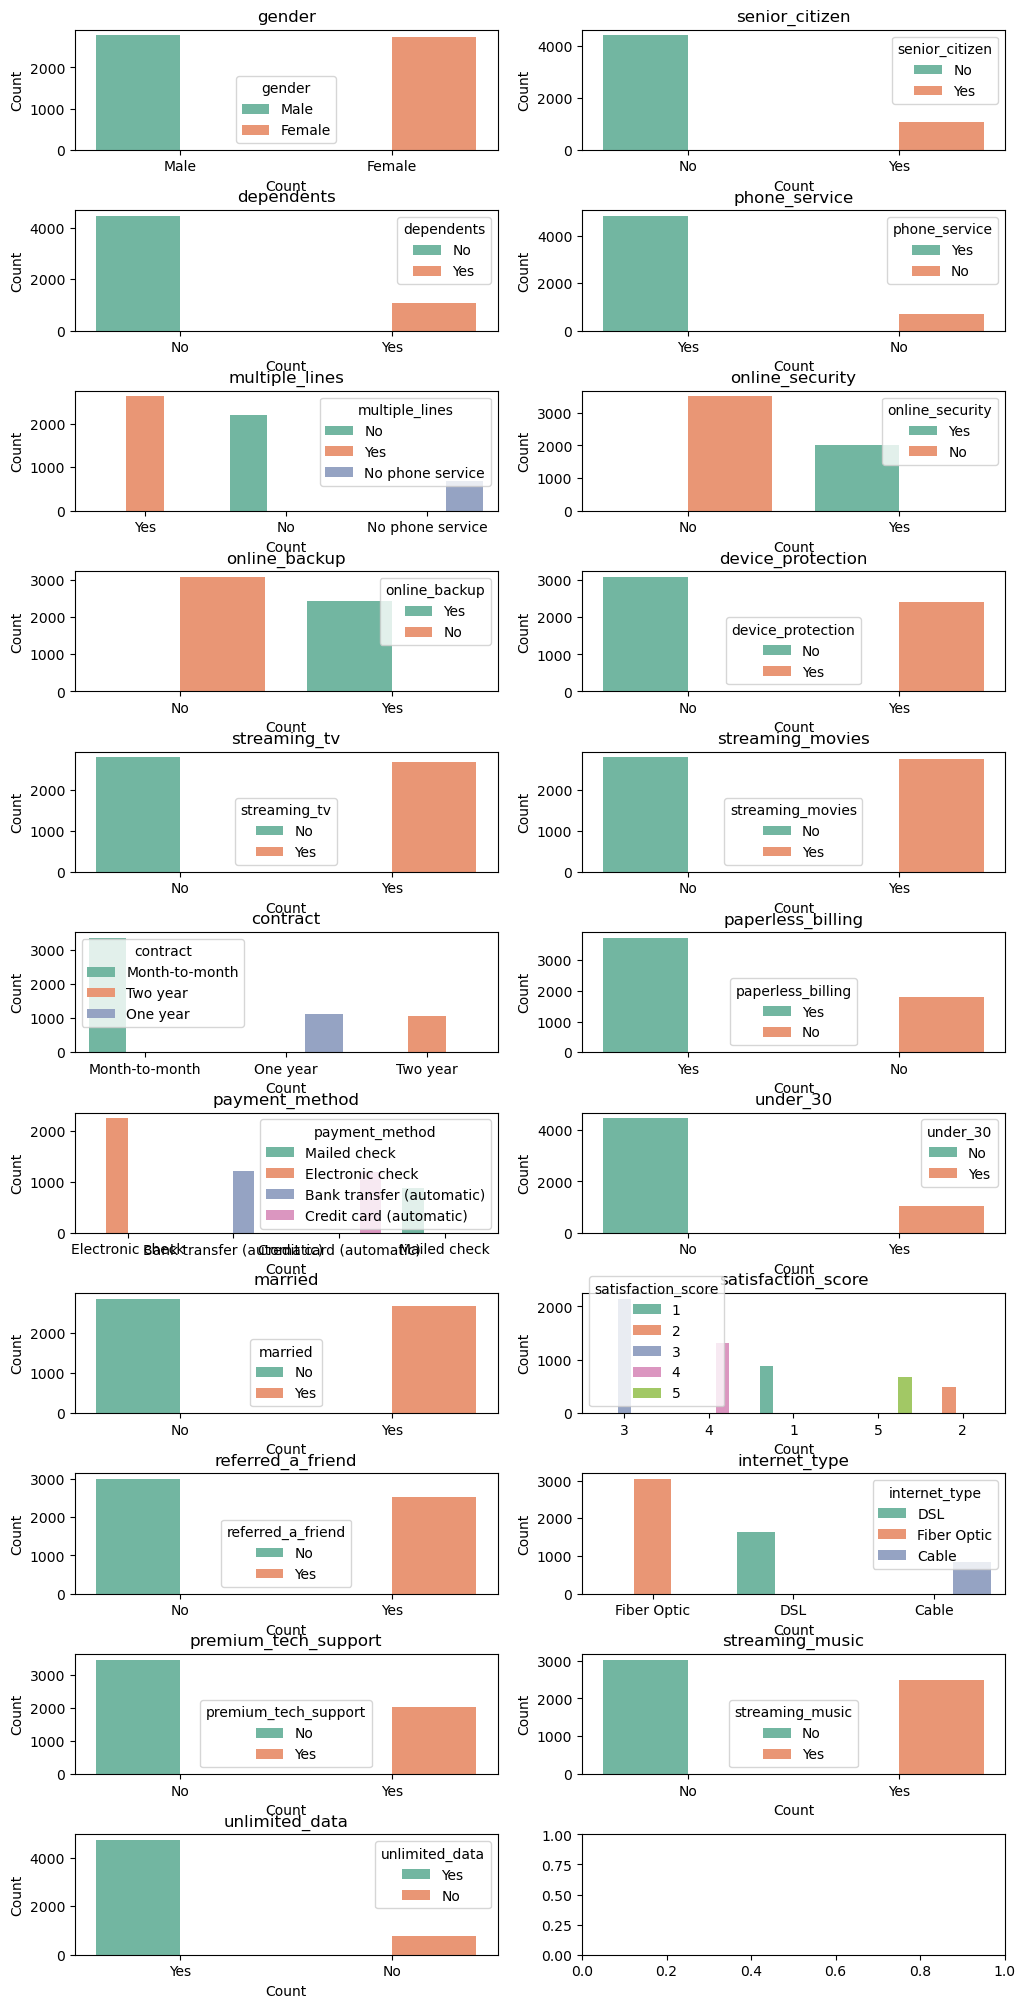

In [21]:
# Creating countplots for the categorical columns

make_countplots(categorical)

## Calculating share's of Categoricals

In [22]:
def calculate_percentage(df):
    percentage_dict = {}

    for column in df.columns:
        value_counts = df[column].value_counts()
        percentages = (value_counts / len(df) * 100).reset_index()
        percentages.columns = [column, 'Percentage']
        percentage_dict[column] = percentages

    return percentage_dict

In [23]:
# Calculate percentages
percentage_results = calculate_percentage(categorical)

In [24]:
# Display the results
for column, percentages in percentage_results.items():
    print(f"\nPercentages for {column}:\n{percentages}")


Percentages for gender:
   gender  Percentage
0    Male   50.344702
1  Female   49.655298

Percentages for senior_citizen:
  senior_citizen  Percentage
0             No   80.224964
1            Yes   19.775036

Percentages for dependents:
  dependents  Percentage
0         No   80.732946
1        Yes   19.267054

Percentages for phone_service:
  phone_service  Percentage
0           Yes    87.66328
1            No    12.33672

Percentages for multiple_lines:
     multiple_lines  Percentage
0               Yes   47.659652
1                No   40.003628
2  No phone service   12.336720

Percentages for online_security:
  online_security  Percentage
0              No   63.443396
1             Yes   36.556604

Percentages for online_backup:
  online_backup  Percentage
0            No    56.00508
1           Yes    43.99492

Percentages for device_protection:
  device_protection  Percentage
0                No   56.132075
1               Yes   43.867925

Percentages for streaming_tv:
  str

There are no main differences in the share of our userbase for these features
* Gender, streaming_tv, streaming_movie, married 

Regarding this features there's a slightly difference in share (+- 15%)
* multiple_lines, online_security, online_backup, device_protection, referred_a_friend, premium_tech_support, streaming_music

This features have a big difference in share between its values (> 15%)
* senior_citizen, dependents, phone_service, contract, paperless_billing, payment_method, under_30, satisfaction_Score, unlimited_data
* These features with more difference (>15 %) will weight more heavily when we anaylize this categories against Churn = 1

### Plotting the categoricals against Churn = 1

In [25]:
def create_churn_pivot_table(df, columns):
    pivot_tables = []
    for column in columns:
        # Calculate Churn_Percentage
        churn_percentage = df.groupby(column)['churn_value'].mean() * 100
        churn_percentage = churn_percentage.rename('Churn_Percentage')

        # Calculate Count
        count = df.groupby(column)['churn_value'].count()
        count = count.rename('Count')

        # Merge the results
        pivot_table = pd.concat([churn_percentage, count], axis=1, sort=False)

        # Add a column for non-churn percentage
        pivot_table['Non_Churn_Percentage'] = 100 - pivot_table['Churn_Percentage']

        # Append the pivot table to the list
        pivot_tables.append((column, pivot_table))

    return pivot_tables

# Function to create a bar plot for each pivot table
def plot_churn_bar(pivot_tables, figsize=(15, 30), space_height=0.8, font_size=12):
    num_columns = len(pivot_tables)
    num_rows = math.ceil(num_columns / 3)  # 3 plots per row, adjust as needed

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize, squeeze=False)
    
    # Adjust the height space between subplots
    fig.subplots_adjust(hspace=space_height)

    for i, (column, pivot_table) in enumerate(pivot_tables):
        # Calculate the position in the subplot grid
        row_idx = i // 3
        col_idx = i % 3

        # Create a bar plot
        ax = sns.barplot(x=pivot_table.index, y='Churn_Percentage', data=pivot_table, ax=axes[row_idx, col_idx])

        # Add labels and title
        ax.set_xlabel(column)
        ax.set_ylabel('Churn Percentage')
        ax.set_title(f'Churn Percentage by {column}')

        # Add text annotations inside the bars with adjusted font size
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', color='white', fontsize=font_size, weight='bold')

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
def plot_churn_custom_histogram(pivot_tables, figsize=(15, 30), space_height=0.8, font_size=12):
    num_columns = len(pivot_tables)
    num_rows = math.ceil(num_columns / 3)  # 3 plots per row, adjust as needed

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize, squeeze=False)
    
    # Adjust the height space between subplots
    fig.subplots_adjust(hspace=space_height)

    for i, (column, pivot_table) in enumerate(pivot_tables):
        # Calculate the position in the subplot grid
        row_idx = i // 3
        col_idx = i % 3

        # Extract counts
        counts = pivot_table['Count']

        # Calculate bins based on the sum of counts
        bin_edges = [counts.iloc[:i+1].sum() for i in range(len(counts)+1)]

        # Create a histogram
        ax = sns.histplot(x=counts, bins=bin_edges, data=pivot_table, ax=axes[row_idx, col_idx], color=sns.color_palette("muted")[0])

        # Add labels and title
        ax.set_xlabel('Count')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Custom Histogram of Counts for {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [26]:
categoricals_to_analyze = categorical.columns

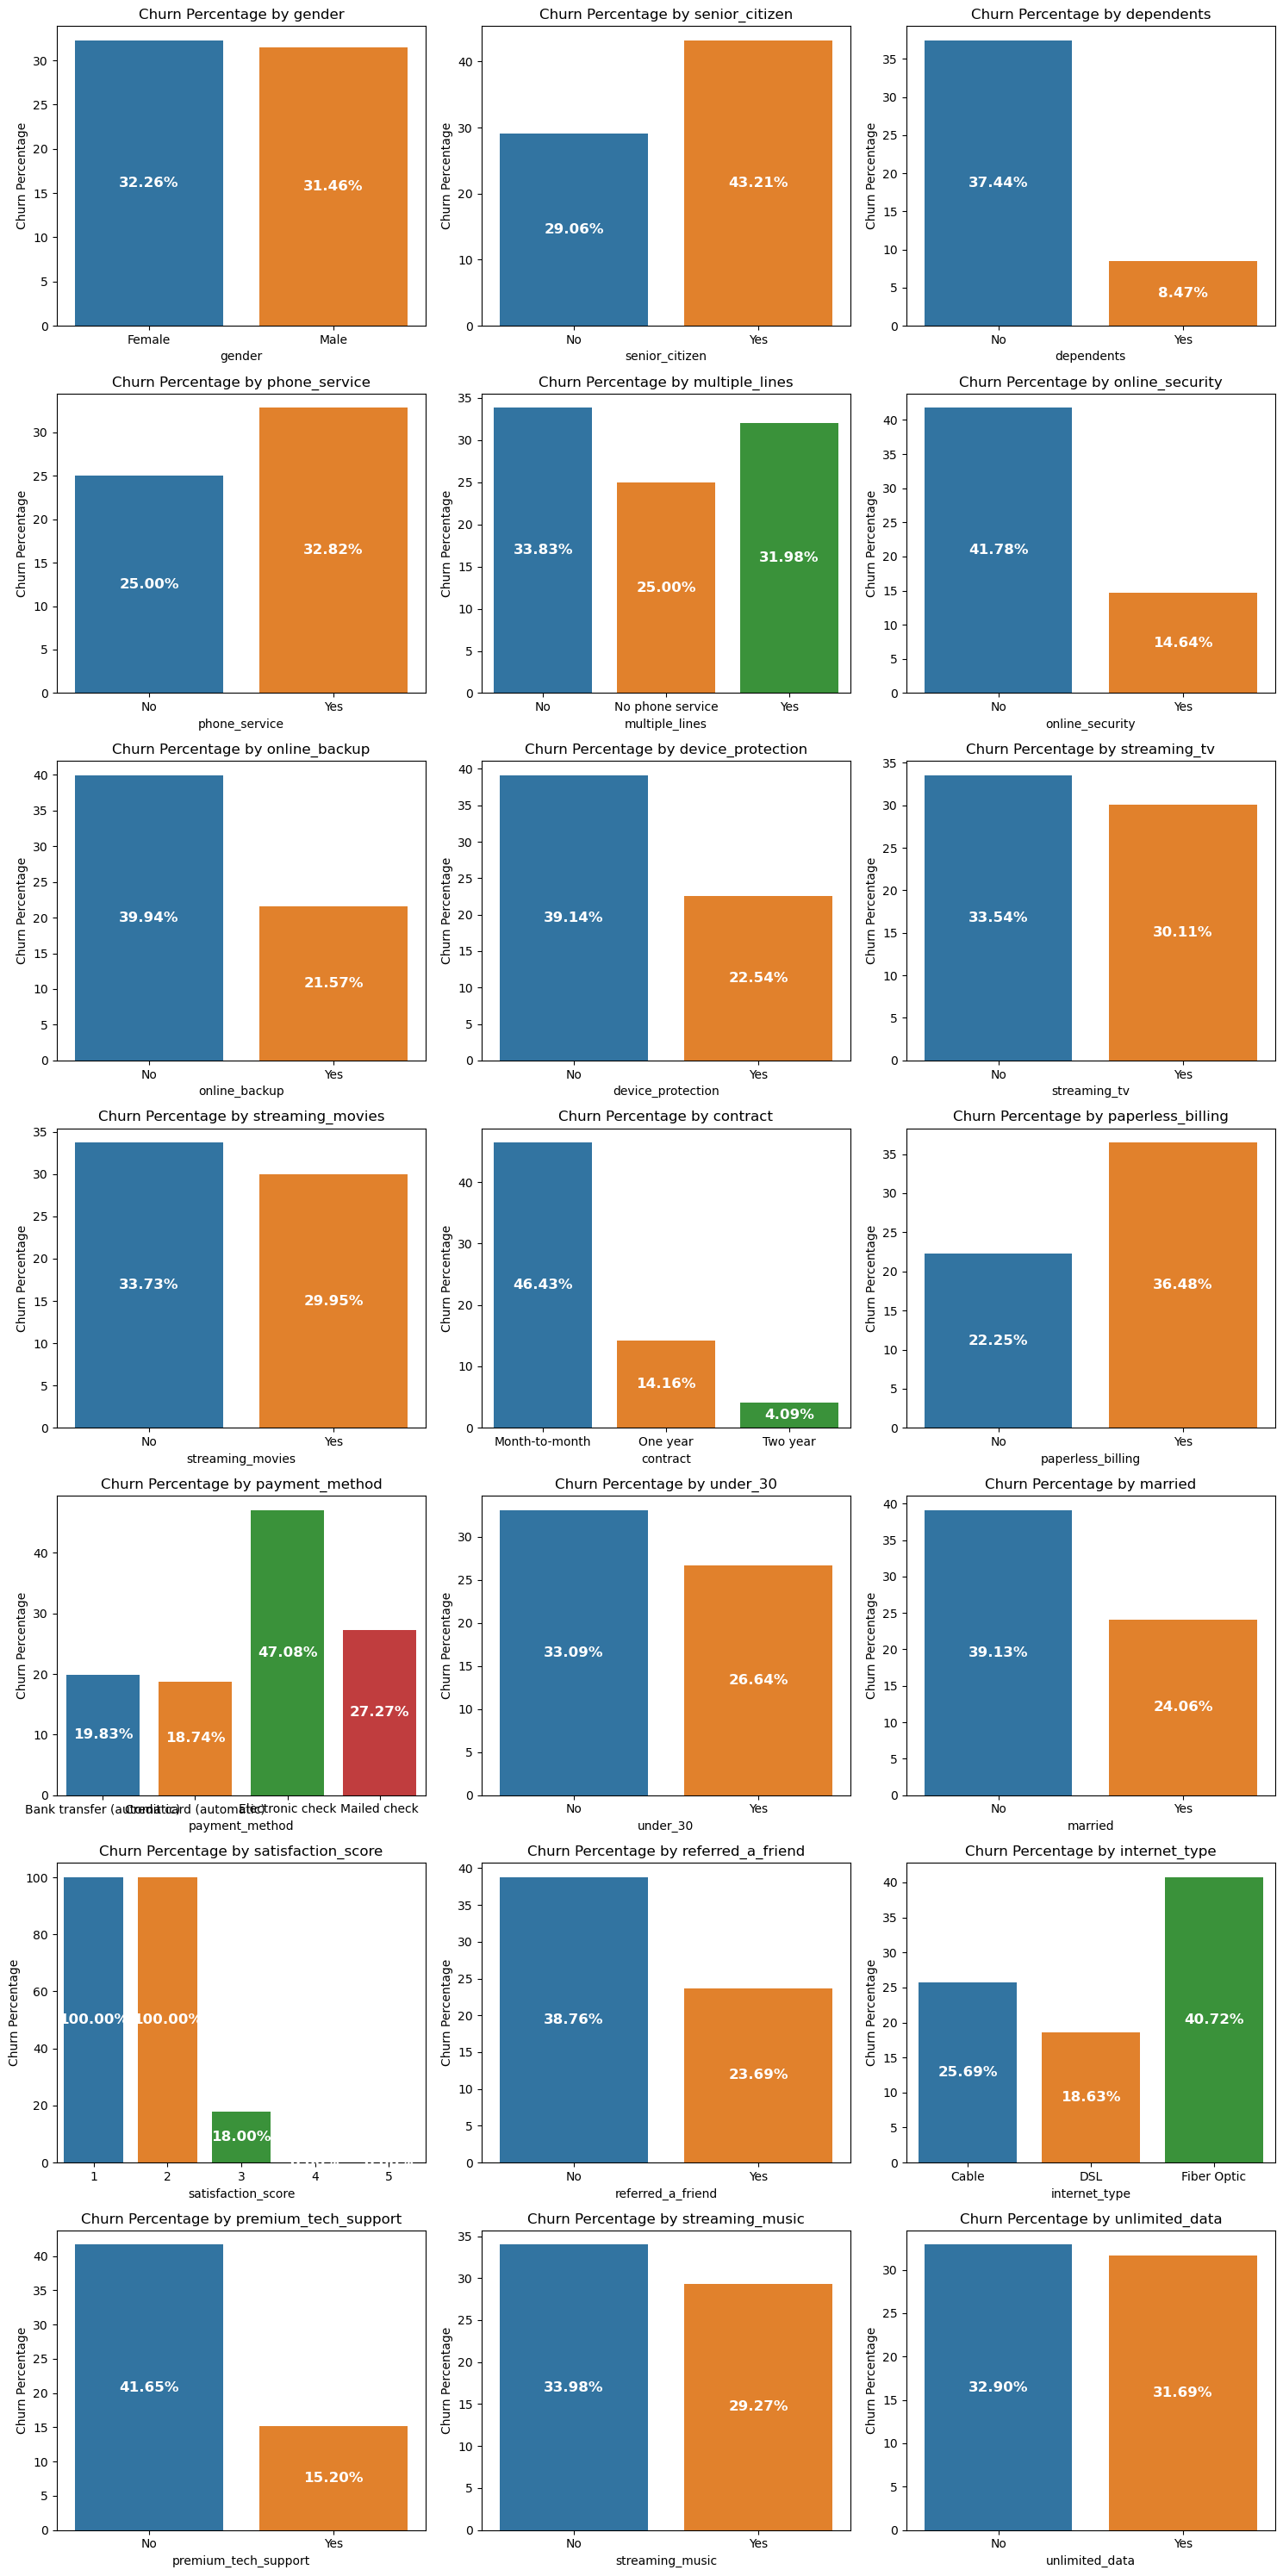

In [27]:
pivot_tables = create_churn_pivot_table(data, categoricals_to_analyze)

plot_churn_bar(pivot_tables, figsize=(15, 30))

* Gender and unlimited_data doesn't show differences between the churned and not churned users
* senior_citizen show a high churn rate, above the 10pp of the total users. This group represents 20% of the userbase.
* Users who doesn't have dependents tend to churn about 4,5 times more than the ones that doesn't. Have dependent 20% userbase.
* Users with phone service churn more than those who doesn't, about the same % as the total userbase. 87% of userbase has phone.
* Users with or without multiple lines have almost the same behavior for churning around 32%. Those who doesn't have phone its 25%. 47% of userbase has multiple_lines.
* Users that pay for online_security show 3 times lower churn rates that those who don't. 36% of userbase has online_security.
* As for the online_backup service, device_protection, premium_tech_support all show a lower churn rate for those who actually contract these services against the ones who doesn´t. 56% of userbase has online_backup.
* As for the streaming, users who do not contract tv, movies, or music streaming services have a slightly higher churn than those who doesn't --> this makes sense since youll need internet to stream. Around 51% of userbase has a streaming service.
* Users who hire the service on a month to month basis are 3 times likely to churn than the ones who contract it for a year or two. 60% of userbase has month to month and 20% for 1 and 2 years.
* Users who don't receive their bill through the mail, happen to have a lower churn (10pp less than userbase) than does who do (14pp difference between the two). This might be the case that seeing the bill reminds you of the price and the spending, so you end up considering abandon it. 67% of userbase has paperless billing.
* As for the payment method, Electronic check has almost 50% chances to churn. Then comes Mailed check at a half of it (27%) and then Bank Transfer and Credit Card around 20%. 40% of userbase has electronic check and 20% of the others.
* Customers under 30, are less likely to churn, 6pp below the general churn. Only 20% of the userbase is under 30.
* Those who are not married are 15pp more likely to churn that those who are. 50% of userbase is married.
* Those users who rated 1 or 2 their satisfaction (Very unsatisfied) ended up churning (the 100%). This is a good estimator of churn behavior! 25% accounts for the userbase that rated with 1 and 2. The largest group is 3 with 40%, then 4 (23%) and 5 (12%).
* Customers who didn't refer to a friend, had a stronger inclination for churning. A 15 pp diference from those who did. 45% referred.
* Users who have contracted fiber optic as their internet type, almost half of them (40%) end up churning. At 25% comes Cable, and 19% for ADSL. This is a strong indication that there might be some problem with fiber. 55% of userbase contracted fiber, 30% DSL and 15% cable.

## Checking Correlation

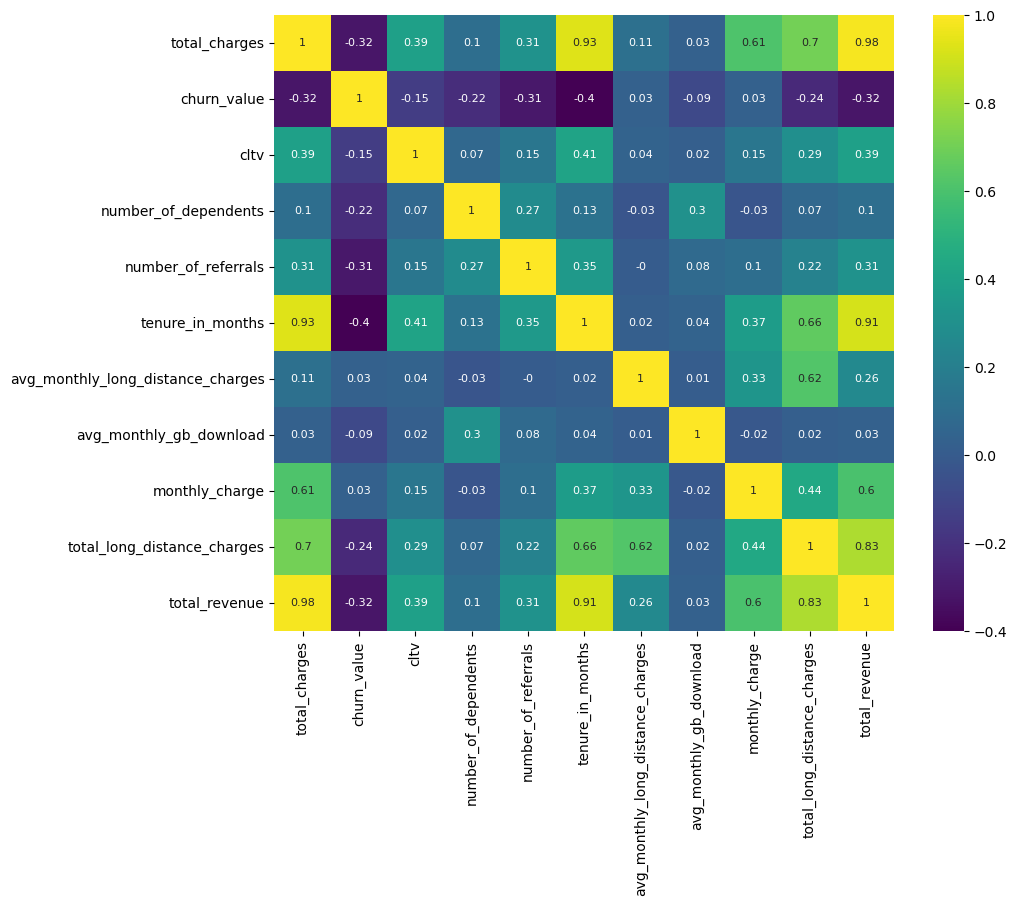

In [28]:
# Correlation matrix

corr_matrix = round(numerical.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={'size': 8})

In [29]:
# From the correlation matrix we can see there are several features that are highly correlated.
# total_revenue and total_charges are the one features with the most correlated other features, so we are going to drop one.

numerical = numerical.drop('total_charges', axis=1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Defining a function to compute the vif to identify possible multicolinearity issues

def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [31]:
# Computing multicolinearity between columns

# Columns to consider
data_num_vif = numerical.copy()
selected_columns = list(data_num_vif.columns)
#selected_columns.remove('churn_value')

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,total_revenue,36.674486
1,tenure_in_months,14.987321
2,total_long_distance_charges,11.042010
3,monthly_charge,3.534063
4,avg_monthly_long_distance_charges,3.194563
5,churn_value,1.325744
6,number_of_referrals,1.242986
7,cltv,1.205190
8,number_of_dependents,1.200857
9,avg_monthly_gb_download,1.101999


In [32]:
# Looking at the VIF value, we can consider dropping total_revenue as well

numerical = numerical.drop('total_revenue', axis=1)

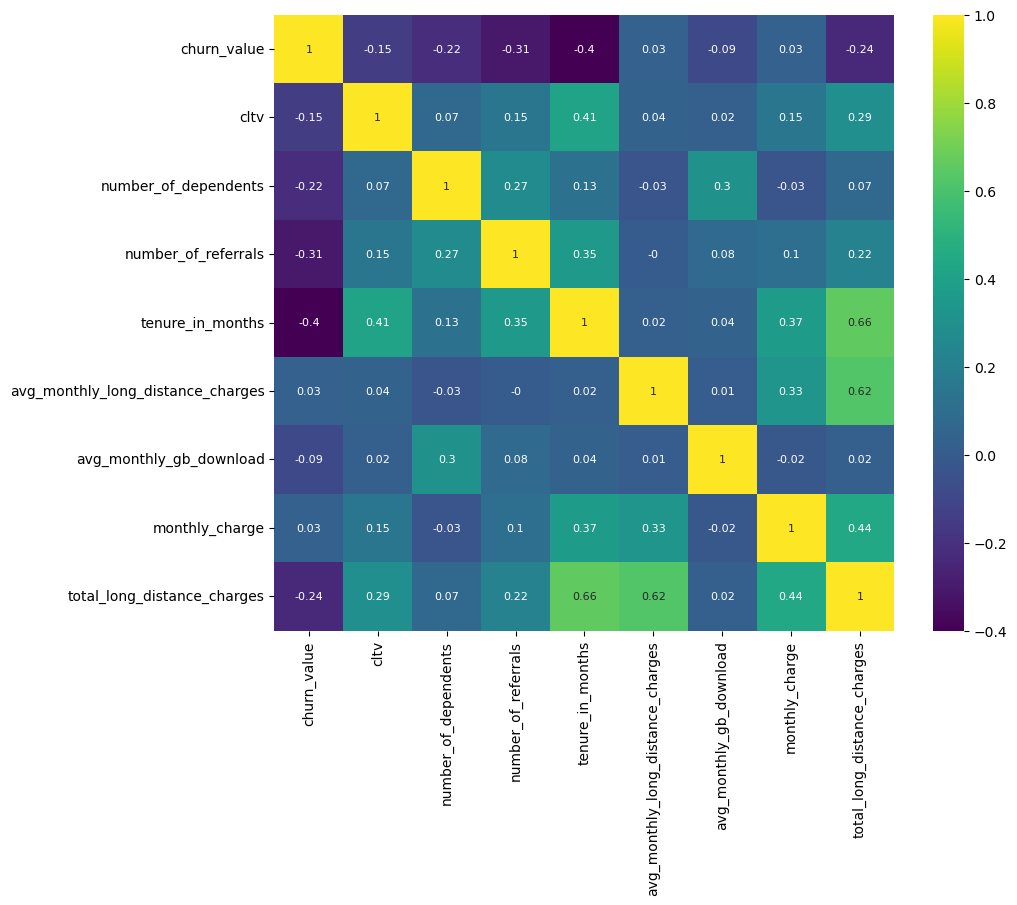

In [33]:
# Lets graph again de correlation matrix

# Correlation matrix

corr_matrix = round(numerical.corr(), 2)

plt.figure(figsize=(10,8))

corr_matrix_display = sns.heatmap(corr_matrix, cmap='viridis', annot=True, annot_kws={'size': 8})

In [34]:
# We calculate again the VIF

# Columns to consider
data_num_vif = numerical.copy()
selected_columns = list(data_num_vif.columns)

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,total_long_distance_charges,4.974262
1,tenure_in_months,3.851448
2,avg_monthly_long_distance_charges,2.982089
3,monthly_charge,1.384181
4,churn_value,1.323560
5,number_of_referrals,1.242545
6,cltv,1.200905
7,number_of_dependents,1.200749
8,avg_monthly_gb_download,1.100810


In [35]:
# Taking a value > 3 for multicolinearity I will drop now the total_long_distance_charges column

numerical = numerical.drop('total_long_distance_charges', axis=1)

In [36]:
# We calculate again the VIF

# Columns to consider
data_num_vif = numerical.copy()
selected_columns = list(data_num_vif.columns)

# compute vif
vif_df = compute_vif(data_num_vif, selected_columns)
display(vif_df)

,Variable,VIF
0,tenure_in_months,1.752098
1,monthly_charge,1.384140
2,churn_value,1.323392
3,number_of_referrals,1.242434
4,cltv,1.200905
5,number_of_dependents,1.200319
6,avg_monthly_long_distance_charges,1.140220
7,avg_monthly_gb_download,1.100544


In [37]:
# There's no more colinearity

In [41]:
numerical.head()

,churn_value,cltv,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge
0,1,3239,0,0,2,10.47,21,53.85
1,1,2701,2,0,2,9.12,51,70.70
2,1,5372,2,0,8,12.15,26,99.65
3,1,5003,3,0,28,4.89,47,104.80
4,1,5340,1,0,49,44.33,11,103.70


## Checking Variance Threshold Method

In [42]:
# to look at VarianceThresholds we need all the variable to be on the same scale
# we will use MinMaxScaler for this
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(numerical)
numerical_scaled = scaler.transform(numerical)


In [43]:
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns = numerical.columns)
numerical_scaled_df.head()

,churn_value,cltv,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge
0,1.0,0.274850,0.000000,0.0,0.014085,0.209442,0.228916,0.318993
1,1.0,0.155215,0.222222,0.0,0.014085,0.182436,0.590361,0.495803
2,1.0,0.749166,0.222222,0.0,0.098592,0.243049,0.289157,0.799580
3,1.0,0.667111,0.333333,0.0,0.380282,0.097820,0.542169,0.853620
4,1.0,0.742050,0.111111,0.0,0.676056,0.886777,0.108434,0.842078


In [44]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02
# sel = VarianceThreshold() has a default value for variance = 0.00
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply
#    a different threshold for different columns

# This determines which columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled_df)
temp = sel.transform(numerical_scaled_df)
temp_df = pd.DataFrame(temp)
print(numerical_scaled_df.shape)
print(temp_df.shape)

(5512, 8)
(5512, 7)


In [45]:
removed_columns = pd.DataFrame(data=(numerical.columns,sel.variances_,sel.get_support()), index=('column_name','variance','statement')).T
#removed_columns.loc[(removed_columns['statement'] == False),:]
removed_columns[removed_columns['statement'] == False]

,column_name,variance,statement
2,number_of_dependents,0.009954,False


In [46]:
temp_df.columns = sel.get_feature_names_out()
temp_df.head()

,churn_value,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge
0,1.0,0.274850,0.0,0.014085,0.209442,0.228916,0.318993
1,1.0,0.155215,0.0,0.014085,0.182436,0.590361,0.495803
2,1.0,0.749166,0.0,0.098592,0.243049,0.289157,0.799580
3,1.0,0.667111,0.0,0.380282,0.097820,0.542169,0.853620
4,1.0,0.742050,0.0,0.676056,0.886777,0.108434,0.842078


In [47]:
numerical = numerical.drop('number_of_dependents', axis=1)

## Concatenating Cleaned Data

In [48]:
numerical.head()

,churn_value,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge
0,1,3239,0,2,10.47,21,53.85
1,1,2701,0,2,9.12,51,70.70
2,1,5372,0,8,12.15,26,99.65
3,1,5003,0,28,4.89,47,104.80
4,1,5340,0,49,44.33,11,103.70


In [49]:
data_cleaned = pd.concat([numerical, categorical], axis=1)

In [50]:
data_cleaned.shape

(5512, 28)

In [51]:
data_cleaned.isna().sum()

churn_value                          0
cltv                                 0
number_of_referrals                  0
tenure_in_months                     0
avg_monthly_long_distance_charges    0
avg_monthly_gb_download              0
monthly_charge                       0
gender                               0
senior_citizen                       0
dependents                           0
phone_service                        0
multiple_lines                       0
online_security                      0
online_backup                        0
device_protection                    0
streaming_tv                         0
streaming_movies                     0
contract                             0
paperless_billing                    0
payment_method                       0
under_30                             0
married                              0
satisfaction_score                   0
referred_a_friend                    0
internet_type                        0
premium_tech_support     

# Data Preprocessing

## Xy Split

In [52]:
# Build X and y
y = data_cleaned['churn_value']
X = data_cleaned.drop(['churn_value'], axis=1)


# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# split numericals and categoricals
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

In [53]:
X_train_num.shape

(3693, 6)

In [54]:
X_train_num.head()

,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge
4276,4700,2,72,0.00,15,49.20
1912,2739,0,5,43.02,42,50.55
2297,2587,10,7,0.00,13,29.80
3055,4387,6,2,0.00,20,30.25
2358,6194,10,67,18.29,11,89.55


## Transforming Numericals

### Checking Skewness

In [55]:
# Calculating skewness of numerical columns

def compute_skewness(df: pd.DataFrame, threshold: int=-2):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')


compute_skewness(X_train_num)

Skewness of columns in the dataframe:

cltv: -0.3
number_of_referrals: 1.54
tenure_in_months: 0.21
avg_monthly_long_distance_charges: 0.08
avg_monthly_gb_download: 1.2
monthly_charge: -0.36


In [56]:
# Main summary statistics of the numerical variables

round(X_train_num.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
cltv,3693.0,4394.52,1185.44,2003.00,3449.00,4520.0,5375.00,6500.00
number_of_referrals,3693.0,1.84,2.93,0.00,0.00,0.0,3.00,11.00
tenure_in_months,3693.0,32.90,24.62,1.00,9.00,30.0,56.00,72.00
avg_monthly_long_distance_charges,3693.0,22.38,15.77,0.00,8.00,22.0,36.36,49.99
avg_monthly_gb_download,3693.0,26.09,19.50,2.00,13.00,21.0,29.00,85.00
monthly_charge,3693.0,77.08,22.00,24.15,60.25,79.6,94.65,118.75


In [57]:
# Values are in range of skewness, no need to do PowerTransform

## Transforming Categoricals

### Categorical - Splitting between Nominal and Ordinal

In [58]:
#Im gonna split between ordinal and nominal

nominal_columns = ['gender', 'senior_citizen', 'dependents', 'paperless_billing', 'under_30', 'married', 'streaming_tv', 'streaming_movies', 'streaming_music'] 
X_train_cat_nominal = X_train_cat[nominal_columns]
X_test_cat_nominal = X_test_cat[nominal_columns]

ordinal_columns = ['phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'contract', 'payment_method', 'satisfaction_score', 'referred_a_friend', 'internet_type', 'premium_tech_support', 'unlimited_data']
X_train_cat_ordinal = X_train_cat[ordinal_columns]
X_test_cat_ordinal = X_test_cat[ordinal_columns]

### Mapping Ordinals

In [59]:
def get_unique_values(dataframe):
    unique_values_dict = {}
    
    for column in dataframe.columns:
        unique_values_dict[column] = pd.Series(dataframe[column].unique())

    unique_values_df = pd.DataFrame(unique_values_dict)
    return unique_values_df

In [60]:
nuevo = get_unique_values(X_train_cat_ordinal)

In [61]:
nuevo

,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data
0,No,No phone service,Yes,Yes,Yes,Two year,Electronic check,3,Yes,DSL,No,Yes
1,Yes,No,No,No,No,Month-to-month,Bank transfer (automatic),4,No,Fiber Optic,Yes,No
2,NaN,Yes,NaN,NaN,NaN,One year,Mailed check,2,NaN,Cable,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Credit card (automatic),5,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [62]:
# Mapping yes and no

mapping_yesno = {'Yes': 1, 'No': 0, 'No phone service':0}
X_train_cat_ordinal['phone_service'] = X_train_cat_ordinal['phone_service'].replace(mapping_yesno)
X_train_cat_ordinal['multiple_lines'] = X_train_cat_ordinal['multiple_lines'].replace(mapping_yesno)
X_train_cat_ordinal['online_security'] = X_train_cat_ordinal['online_security'].replace(mapping_yesno)
X_train_cat_ordinal['online_backup'] = X_train_cat_ordinal['online_backup'].replace(mapping_yesno)
X_train_cat_ordinal['device_protection'] = X_train_cat_ordinal['device_protection'].replace(mapping_yesno)
X_train_cat_ordinal['referred_a_friend'] = X_train_cat_ordinal['referred_a_friend'].replace(mapping_yesno)
X_train_cat_ordinal['premium_tech_support'] = X_train_cat_ordinal['premium_tech_support'].replace(mapping_yesno)
X_train_cat_ordinal['unlimited_data'] = X_train_cat_ordinal['unlimited_data'].replace(mapping_yesno)

X_test_cat_ordinal['phone_service'] = X_test_cat_ordinal['phone_service'].replace(mapping_yesno)
X_test_cat_ordinal['multiple_lines'] = X_test_cat_ordinal['multiple_lines'].replace(mapping_yesno)
X_test_cat_ordinal['online_security'] = X_test_cat_ordinal['online_security'].replace(mapping_yesno)
X_test_cat_ordinal['online_backup'] = X_test_cat_ordinal['online_backup'].replace(mapping_yesno)
X_test_cat_ordinal['device_protection'] = X_test_cat_ordinal['device_protection'].replace(mapping_yesno)
X_test_cat_ordinal['referred_a_friend'] = X_test_cat_ordinal['referred_a_friend'].replace(mapping_yesno)
X_test_cat_ordinal['premium_tech_support'] = X_test_cat_ordinal['premium_tech_support'].replace(mapping_yesno)
X_test_cat_ordinal['unlimited_data'] = X_test_cat_ordinal['unlimited_data'].replace(mapping_yesno)

C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\2996108053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['phone_service'] = X_train_cat_ordinal['phone_service'].replace(mapping_yesno)
C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\2996108053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['multiple_lines'] = X_train_cat_ordinal['multiple_lines'].replace(mapping_yesno)
C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\2996108053.py:6: SettingWithCopyWarning

For the other ordinals, we need to calculate how much each value weights in Churn = 1 for each column

In [63]:
def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, churn_col: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - churn_col: binary column indicating churn (1) or non-churn (0)
    Outputs:
    - mapping dictionary
    '''
    grouped_df = df.groupby(col_convert)[[churn_col]].mean().sort_values(by=churn_col, ascending=False)

    # Calculate the proportion of churn within each category
    churn_proportion = grouped_df[churn_col] / grouped_df.groupby(col_convert)[churn_col].transform('count')

    # Adjust the proportion based on the proportion of churn within each category using the maximum value
    adjusted_proportion = churn_proportion / churn_proportion.max()

    mapping_dict = adjusted_proportion.to_dict()

    return mapping_dict

In [64]:
mapping_internet = ordinal_cat_conversion_dict(data, 'internet_type', 'churn_value')
mapping_internet

{'Fiber Optic': 1.0, 'Cable': 0.6309069296262897, 'DSL': 0.45742657570616146}

In [65]:
# Mapping internet_type

mapping_internet = {'DSL': 0.45, 'Cable': 0.63, 'Fiber Optic': 1}
X_train_cat_ordinal['internet_type'] = X_train_cat_ordinal['internet_type'].replace(mapping_internet)
X_test_cat_ordinal['internet_type'] = X_test_cat_ordinal['internet_type'].replace(mapping_internet)

X_train_cat_ordinal['internet_type'].unique()

C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\3132817944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['internet_type'] = X_train_cat_ordinal['internet_type'].replace(mapping_internet)
C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\3132817944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal['internet_type'] = X_test_cat_ordinal['internet_type'].replace(mapping_internet)


array([0.45, 1.  , 0.63])

In [66]:
mapping_contract = ordinal_cat_conversion_dict(data, 'contract', 'churn_value')
mapping_contract

{'Month-to-month': 1.0,
 'One year': 0.30488281204726,
 'Two year': 0.08802733439549591}

In [67]:
mapping_contract = {'Month-to-month': 1, 'One year': 0.30, 'Two year':0.08}
X_train_cat_ordinal['contract'] = X_train_cat_ordinal['contract'].replace(mapping_contract)
X_test_cat_ordinal['contract'] = X_test_cat_ordinal['contract'].replace(mapping_contract)

C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\721528510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['contract'] = X_train_cat_ordinal['contract'].replace(mapping_contract)
C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\721528510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal['contract'] = X_test_cat_ordinal['contract'].replace(mapping_contract)


In [68]:
mapping_payment_method = ordinal_cat_conversion_dict(data, 'payment_method', 'churn_value')
mapping_payment_method

{'Electronic check': 1.0,
 'Mailed check': 0.5792871900826446,
 'Bank transfer (automatic)': 0.42129977460555973,
 'Credit card (automatic)': 0.3980368283677107}

In [69]:
mapping_payment_method = {'Mailed check': 0.579, 'Electronic check': 1, 'Bank transfer (automatic)':0.42,'Credit card (automatic)':0.39}
X_train_cat_ordinal['payment_method'] = X_train_cat_ordinal['payment_method'].replace(mapping_payment_method)
X_test_cat_ordinal['payment_method'] = X_test_cat_ordinal['payment_method'].replace(mapping_payment_method)

C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\4161874572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['payment_method'] = X_train_cat_ordinal['payment_method'].replace(mapping_payment_method)
C:\Users\joaco\AppData\Local\Temp\ipykernel_8320\4161874572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal['payment_method'] = X_test_cat_ordinal['payment_method'].replace(mapping_payment_method)


In [70]:
nuevo = get_unique_values(X_train_cat_ordinal)

In [71]:
nuevo

,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data
0,0.0,0.0,1.0,1.0,1.0,0.08,1.000,3,1.0,0.45,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.00,0.420,4,0.0,1.00,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,0.30,0.579,2,NaN,0.63,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.390,5,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [79]:
X_train_cat_ordinal.head()

,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data
4276,0,0,1,1,1,0.08,1.000,3,1,0.45,0,1
1912,1,0,0,1,0,1.00,0.420,3,0,0.45,0,1
2297,0,0,1,0,0,1.00,0.420,3,1,0.45,0,1
3055,0,0,0,1,0,1.00,0.579,3,1,0.45,0,1
2358,1,1,1,1,0,0.30,1.000,3,1,1.00,1,1


### Encoding Nominals

In [80]:
X_train_cat_nominal.head()

,gender,senior_citizen,dependents,paperless_billing,under_30,married,streaming_tv,streaming_movies,streaming_music
4276,Female,No,No,Yes,No,Yes,No,Yes,Yes
1912,Female,No,No,No,Yes,No,No,No,No
2297,Male,Yes,No,No,No,Yes,No,No,No
3055,Female,No,Yes,Yes,No,Yes,No,No,No
2358,Male,No,Yes,No,No,Yes,No,No,No


In [81]:
# Encode categoricals with OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

X_train_cat_nom_encoded = encoder.fit_transform(X_train_cat_nominal).toarray()
X_test_cat_nom_encoded  = encoder.transform(X_test_cat_nominal).toarray()

X_train_cat_nom_encoded_df = pd.DataFrame(X_train_cat_nom_encoded, columns=encoder.get_feature_names_out(), index=X_train_cat_nominal.index)
X_test_cat_nom_encoded_df = pd.DataFrame(X_test_cat_nom_encoded, columns=encoder.get_feature_names_out(), index=X_test_cat_nominal.index)


In [82]:
display(X_train_cat_nom_encoded_df.head())
display(X_test_cat_nom_encoded_df.head())

,gender_Male,senior_citizen_Yes,dependents_Yes,paperless_billing_Yes,under_30_Yes,married_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes
4276,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2297,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3055,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2358,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


,gender_Male,senior_citizen_Yes,dependents_Yes,paperless_billing_Yes,under_30_Yes,married_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes
3499,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1056,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3571,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1052,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [107]:
import os
import pickle
  
# Saving Encoder

path = "../models/encoders/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "OneHotEncoder.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

## Concatenating the Dataframes

In [83]:
# Concatenating the transformed numerical dataframes with the categorical ones

X_train_merged = pd.concat([X_train_num, X_train_cat_ordinal, X_train_cat_nom_encoded_df], axis=1)
X_test_merged = pd.concat([X_test_num, X_test_cat_ordinal, X_test_cat_nom_encoded_df], axis=1)
X_merged = pd.concat([X_train_merged,X_test_merged])

print(X_train_merged.shape)
print(X_test_merged.shape)
print(X_merged.shape)

(3693, 27)
(1819, 27)
(5512, 27)


In [84]:
X_merged.head()

,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data,gender_Male,senior_citizen_Yes,dependents_Yes,paperless_billing_Yes,under_30_Yes,married_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes
4276,4700,2,72,0.00,15,49.20,0,0,1,1,1,0.08,1.000,3,1,0.45,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1912,2739,0,5,43.02,42,50.55,1,0,0,1,0,1.00,0.420,3,0,0.45,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2297,2587,10,7,0.00,13,29.80,0,0,1,0,0,1.00,0.420,3,1,0.45,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3055,4387,6,2,0.00,20,30.25,0,0,0,1,0,1.00,0.579,3,1,0.45,0,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2358,6194,10,67,18.29,11,89.55,1,1,1,1,0,0.30,1.000,3,1,1.00,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
X_test_merged.head()

,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data,gender_Male,senior_citizen_Yes,dependents_Yes,paperless_billing_Yes,under_30_Yes,married_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes
3499,4021,4,23,37.86,30,57.20,1,0,1,0,0,0.3,0.390,3,1,0.45,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
778,3615,0,29,0.00,7,30.60,0,0,0,1,0,1.0,1.000,2,0,0.45,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1056,4522,0,2,5.57,24,66.40,1,0,1,0,1,1.0,0.420,1,0,0.63,0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3571,3866,0,26,25.40,10,69.50,1,1,1,1,0,1.0,0.420,4,0,0.45,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1052,4626,1,22,42.98,30,61.15,1,0,1,1,1,1.0,0.579,1,1,0.45,0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


## Scaling Final DataFrame

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train_merged)

X_train_scaled = scaler.transform(X_train_merged)
X_test_scaled = scaler.transform(X_test_merged)

X_train_new = pd.DataFrame(X_train_scaled, columns=X_train_merged.columns, index=X_train_merged.index)
X_test_new = pd.DataFrame(X_test_scaled, columns=X_test_merged.columns, index=X_test_merged.index)

X_train_new.head()

,cltv,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,phone_service,multiple_lines,online_security,online_backup,device_protection,contract,payment_method,satisfaction_score,referred_a_friend,internet_type,premium_tech_support,unlimited_data,gender_Male,senior_citizen_Yes,dependents_Yes,paperless_billing_Yes,under_30_Yes,married_Yes,streaming_tv_Yes,streaming_movies_Yes,streaming_music_Yes
4276,0.599733,0.181818,1.000000,0.000000,0.156627,0.264799,0.0,0.0,1.0,1.0,1.0,0.00000,1.000000,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1912,0.163665,0.000000,0.056338,0.860572,0.481928,0.279070,1.0,0.0,0.0,1.0,0.0,1.00000,0.049180,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2297,0.129864,0.909091,0.084507,0.000000,0.132530,0.059725,0.0,0.0,1.0,0.0,0.0,1.00000,0.049180,0.5,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3055,0.530131,0.545455,0.014085,0.000000,0.216867,0.064482,0.0,0.0,0.0,1.0,0.0,1.00000,0.309836,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2358,0.931955,0.909091,0.929577,0.365873,0.108434,0.691332,1.0,1.0,1.0,1.0,0.0,0.23913,1.000000,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
# Saving Scaler

path = "../models/scalers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "MinMaxScaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

# Predicting Churn

## Loading Logistic Regression, KNN and Decision Trees

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


logreg_model = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors, weights=["uniform","distance"],p = [1,2,3]
tree_model = DecisionTreeClassifier(max_depth=5) # max_depth, min_samples_split, means_samples_leaf, criterion

## Training and Results

In [88]:
def evaluate_models(model_pipeline, model_names, X_train_new, y_train, X_test_new, y_test):
    scores_means = {}
    scores_sds = {}

    for model, model_name in zip(model_pipeline, model_names):
        mean_score = np.mean(cross_val_score(model, X_train_new, y_train, cv=10)).round(2)
        sd_score = np.std(cross_val_score(model, X_train_new, y_train, cv=10)).round(2)
        
        model.fit(X_train_new, y_train)
        y_pred_test = model.predict(X_test_new)
        y_pred_train = model.predict(X_train_new)
        
        print("The accuracy of the model {} is {:.2f} in the TEST SET".format(model_name, model.score(X_test_new, y_test)))
        print("")
        print("The accuracy of the model {} in the TRAIN set is: {:.2f}".format(model_name, accuracy_score(y_train, y_pred_train)))
        print("The accuracy of the model {} in the TEST set is: {:.2f}".format(model_name, accuracy_score(y_test, y_pred_test)))
        print("The precision of the model {} in the TRAIN set is: {:.2f}".format(model_name, precision_score(y_train, y_pred_train)))
        print("The precision of the model {} in the TEST set is: {:.2f}".format(model_name, precision_score(y_test, y_pred_test)))
        print("The recall of the model {} in the TRAIN set is: {:.2f}".format(model_name, recall_score(y_train, y_pred_train)))
        print("The recall of the model {} in the TEST set is: {:.2f}".format(model_name, recall_score(y_test, y_pred_test)))
        print("The F1 of the model {} in the TRAIN set is: {:.2f}".format(model_name, f1_score(y_train, y_pred_train)))
        print("The F1 of the model {} in the TEST set is: {:.2f}".format(model_name, f1_score(y_test, y_pred_test)))
        print("The Kappa of the model {} in the TRAIN set is: {:.2f}".format(model_name, cohen_kappa_score(y_train, y_pred_train)))
        print("The Kappa of the model {} in the TEST set is: {:.2f}".format(model_name, cohen_kappa_score(y_test, y_pred_test)))
        print("")
        
        scores_means[model_name] = mean_score
        scores_sds[model_name] = sd_score
        
        cm_test = confusion_matrix(y_test, y_pred_test)
        disp = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
        disp.plot()

    return scores_means, scores_sds


The accuracy of the model Logistic Regression is 0.95 in the TEST SET

The accuracy of the model Logistic Regression in the TRAIN set is: 0.95
The accuracy of the model Logistic Regression in the TEST set is: 0.95
The precision of the model Logistic Regression in the TRAIN set is: 0.94
The precision of the model Logistic Regression in the TEST set is: 0.92
The recall of the model Logistic Regression in the TRAIN set is: 0.92
The recall of the model Logistic Regression in the TEST set is: 0.90
The F1 of the model Logistic Regression in the TRAIN set is: 0.93
The F1 of the model Logistic Regression in the TEST set is: 0.91
The Kappa of the model Logistic Regression in the TRAIN set is: 0.89
The Kappa of the model Logistic Regression in the TEST set is: 0.87

The accuracy of the model KNN Neihgbor is 0.82 in the TEST SET

The accuracy of the model KNN Neihgbor in the TRAIN set is: 0.89
The accuracy of the model KNN Neihgbor in the TEST set is: 0.82
The precision of the model KNN Neihgbor 

({'Logistic Regression': 0.95,
  'KNN Neihgbor': 0.83,
  'Decision Tree Classifier': 0.95},
 {'Logistic Regression': 0.01,
  'KNN Neihgbor': 0.02,
  'Decision Tree Classifier': 0.01})

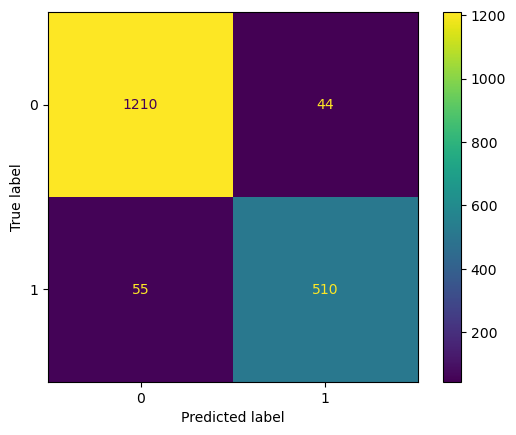

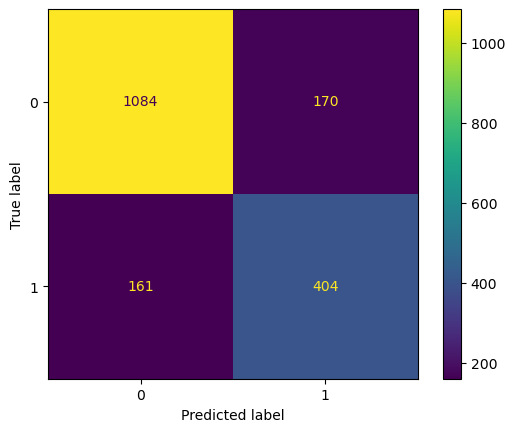

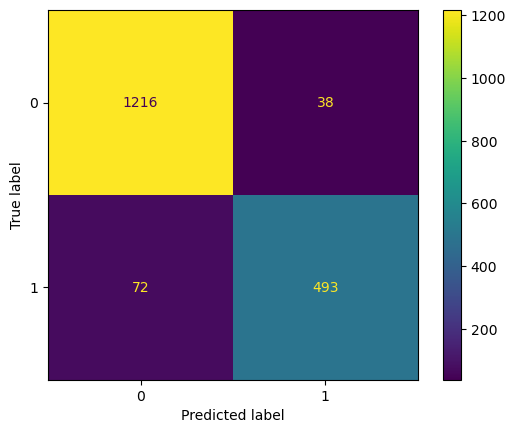

In [89]:
model_pipeline = [logreg_model, knn_model, tree_model]
model_names = ['Logistic Regression', 'KNN Neihgbor', 'Decision Tree Classifier']

evaluate_models(model_pipeline, model_names, X_train_new, y_train, X_test_new, y_test)

In [109]:
# Saving models

path = "../models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "LogRegression_first.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(logreg_model, file)

filename = "KNN_first.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(knn_model, file)
    
filename = "DecisionTree_first.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(tree_model, file)

## HyperParameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

# Specify grids of hyperparameters to try

dtree_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [5, 7, 8, 9, 10],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10]}
knn_grid =   {'n_neighbors': [2,3, 4, 5, 6, 7],
              'p': [1,2,3,4,5],
              'weights':["uniform","distance"]}

# Create instances of GridSearchCV object

gcv_knn = GridSearchCV(knn_model, knn_grid, scoring='recall', cv=5)
gcv_dtree = GridSearchCV(tree_model, dtree_grid, scoring='recall', cv=10)

In [91]:
gcv_knn.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [92]:
gcv_dtree.fit(X_train_new, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [93]:
for clf, gcv in zip([knn_model, tree_model], [gcv_knn,gcv_dtree ]):
    print('-'*70, f'\n{clf.__class__.__name__}', '\n'+'-'*70)
    print(f'Best parameters: {gcv.best_params_}')
    print(f'Best recall    : {gcv.best_score_*100:.2f}%\n')

---------------------------------------------------------------------- 
KNeighborsClassifier 
----------------------------------------------------------------------
Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best recall    : 77.83%

---------------------------------------------------------------------- 
DecisionTreeClassifier 
----------------------------------------------------------------------
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best recall    : 91.61%



In [94]:
# Define instances with best parameters

tree_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 9, min_samples_leaf= 6, min_samples_split= 4)
knn_model2 = KNeighborsClassifier(n_neighbors= 7, p= 1, weights = 'distance')
#tree_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, min_samples_leaf= 10, min_samples_split= 2)

The accuracy of the model KNN Neihgbor is 0.85 in the TEST SET

The accuracy of the model KNN Neihgbor in the TRAIN set is: 1.00
The accuracy of the model KNN Neihgbor in the TEST set is: 0.85
The precision of the model KNN Neihgbor in the TRAIN set is: 1.00
The precision of the model KNN Neihgbor in the TEST set is: 0.75
The recall of the model KNN Neihgbor in the TRAIN set is: 1.00
The recall of the model KNN Neihgbor in the TEST set is: 0.77
The F1 of the model KNN Neihgbor in the TRAIN set is: 1.00
The F1 of the model KNN Neihgbor in the TEST set is: 0.76
The Kappa of the model KNN Neihgbor in the TRAIN set is: 1.00
The Kappa of the model KNN Neihgbor in the TEST set is: 0.65

The accuracy of the model Decision Tree Classifier is 0.94 in the TEST SET

The accuracy of the model Decision Tree Classifier in the TRAIN set is: 0.96
The accuracy of the model Decision Tree Classifier in the TEST set is: 0.94
The precision of the model Decision Tree Classifier in the TRAIN set is: 0.96
The

({'KNN Neihgbor': 0.86, 'Decision Tree Classifier': 0.95},
 {'KNN Neihgbor': 0.02, 'Decision Tree Classifier': 0.01})

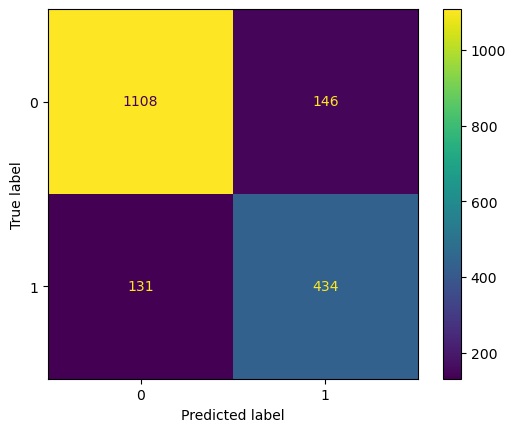

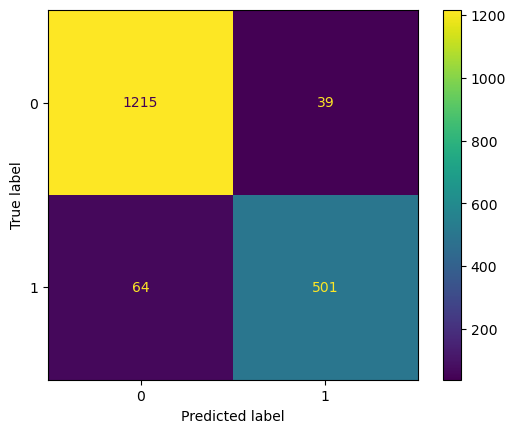

In [95]:
#Train model and evaluate

model_pipeline = [knn_model2, tree_model2 ]
model_names = [ 'KNN Neihgbor' , 'Decision Tree Classifier']

evaluate_models(model_pipeline, model_names, X_train_new, y_train, X_test_new, y_test)

In [110]:
# Saving HyperParameter Tuning models

path = "../models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "KNN_tuned.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(knn_model2, file)
    
filename = "DecisionTree_tuned.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(tree_model2, file)

### Feature Importance

In [96]:
# We are trying to delve deep what are the features that impact Churn. So we are going to analyze the coefficients of the Log Regression

log_coefficients = logreg_model.coef_[0]
feature_names = X_train_new.columns

# Calculating the exponential of the log
coefficients = np.exp(log_coefficients)

# Creating a DataFrame
df_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Log Coefficient': log_coefficients,
    'Coefficient': coefficients
})

# Sorting the DataFrame by absolute values of coefficients
df_coefficients_sorted = df_coefficients.reindex(df_coefficients['Coefficient'].abs().sort_values(ascending=False).index)


display(df_coefficients_sorted)

,Feature,Log Coefficient,Coefficient
5,monthly_charge,0.894807,2.446865
14,referred_a_friend,0.676559,1.967098
26,streaming_music_Yes,0.460306,1.584559
23,married_Yes,0.412108,1.509997
7,multiple_lines,0.347366,1.415334
12,payment_method,0.338612,1.402999
21,paperless_billing_Yes,0.245945,1.278829
19,senior_citizen_Yes,0.235053,1.264976
15,internet_type,0.216550,1.241785
3,avg_monthly_long_distance_charges,0.198438,1.219496


### Permutation importance

In [97]:
from sklearn.inspection import permutation_importance

result = permutation_importance(logreg_model, X_test_new, y_test, n_repeats=10)
print(result.importances_mean)

# model_pipeline = [logreg_model, knn, tree_model]

[ 1.64925783e-04  1.49532710e-02  1.01154480e-02 -3.29851567e-04
 -3.29851567e-04  2.74876306e-04  2.91368884e-03 -5.49752611e-05
  1.13798791e-02  8.24628917e-04 -1.75920836e-03  9.34579439e-04
 -1.64925783e-04  2.83287521e-01  4.89279824e-03 -1.09950522e-03
 -5.49752611e-05  1.09950522e-04  6.04727872e-04  1.59428257e-03
  5.22264981e-03  1.04452996e-03  4.94777350e-04  1.53930731e-03
 -7.14678395e-04  8.24628917e-04  1.75920836e-03]


In [98]:
feature_names = X_test_new.columns

# DataFrame with feature names and mean importances
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Permutation Importance': result.importances_mean
})

# Sort the DataFrame in descending order
df_importances_sorted = df_importances.sort_values(by='Permutation Importance', ascending=False)

# Display the sorted DataFrame
print(df_importances_sorted)

                              Feature  Permutation Importance
13                 satisfaction_score                0.283288
1                 number_of_referrals                0.014953
8                     online_security                0.011380
2                    tenure_in_months                0.010115
20                     dependents_Yes                0.005223
14                  referred_a_friend                0.004893
6                       phone_service                0.002914
26                streaming_music_Yes                0.001759
19                 senior_citizen_Yes                0.001594
23                        married_Yes                0.001539
21              paperless_billing_Yes                0.001045
11                           contract                0.000935
25               streaming_movies_Yes                0.000825
9                       online_backup                0.000825
18                        gender_Male                0.000605
22      

Now that we know which are the features that play a big role in the models, lets find out what is the reason declared by the users of their churn.

In [99]:
# Calculate churn rate and count for each city and churn reason
by_reason = full_data.groupby(['churn_reason', 'internet_type'])['churn_value' ].agg(churn_value='sum', count='count').reset_index()

# Resetting the index to have a DataFrame
by_reason = by_reason.sort_values(by='churn_value', ascending=False).reset_index(drop=True)
by_reason.head(100)

,churn_reason,internet_type,churn_value,count
0,Attitude of support person,Fiber Optic,126,126
1,Competitor offered higher download speeds,Fiber Optic,120,120
2,Competitor offered more data,Fiber Optic,114,114
3,Competitor made better offer,Fiber Optic,101,101
4,Attitude of service provider,Fiber Optic,99,99
5,Don't know,Fiber Optic,93,93
6,Competitor had better devices,Fiber Optic,76,76
7,Price too high,Fiber Optic,70,70
8,Network reliability,Fiber Optic,64,64
9,Product dissatisfaction,Fiber Optic,64,64


# Conclusions

Having analyzed the dataset and its variables we came up with some insights about it.

* Churn for this Telco company is really high, 32% in a Q. It definately needs to do some adjustments, otherwise there will be a whole new breed of customers that will churn in a short amount of time. This is really costly and probably doesn't end up repaying the acquisition cost.

* As for the geography, it doesn't seem to be a focal area with more or less churn. Data is too much atomized. Grouping needs to be done.

* Customers who churn tend to do it by the 10 month, probably not having repaid the acquisition costs (marketing and also internet equipment). Proactive campaigns can be done so as to reduce churn and extend LTV.

* Users that contract the service on a month to month basis are 3 times likely to churn than the ones who contract it for a year or two. Month to month, accounts for 60% of the userbase. If the Telco wants to improve its churn, it really needs to find ways to convert users to a yearly contract. Price is the dominant factor (as its always), signup offers can work, but also develop retention strategies whenever a user wants to dropout.

* Defaulting users to electronic billing can also make a difference. These happen to have 22% chance of Churning. Seeing the bill generates a moment of consideration about what you are paying.

* Having discounts for some preferred payment methods such as credit card or bank transfer, can make a difference in churn. These 2 have the lowest churn rate at about 20%.

* Satisfaction score is an impressive great indicator of churn. Customers who rated 1 and 2, have all churned. This accounts for 25% of the userbase, and thats a really big number of users that are very unsatisfied.

* There might be an issue with the fiber-optic service, since 40% ended up churning, and fiber accounts for 55% of our userbase.
    * Investigating the Churn reasons, found that prices are too high for Fiber optic, and also there were some network issues.

* As for the models, we could succesfully predict churn with really high accuracy. Also the other evaluation metrics such as precision, recall, F1 and kappa had an excellent performance. Specially with logistic regression.

* Decision trees had an incredible performance as well, and KNN did a good job, although it started to look like there was some overfitting and there is class imbalance. So some technique could be applied to manage it and rerun the model and check for better performance.

* Although the performance was already great, there was some Hyperparameter Tuning, but in the end, there was no improvement over the original results.

* We also were curious about what were the factors that contribuited in the prediction of the model and it came down to satisfaction score, tenure in months, number of referrals, online_security. The top 3 have a correlation with what we've seen with the EDA.



* Analyzing qualitative data, you can find the #1 reason for churning is that competitors offered higher speeds.
* Also, there might be an issue with the training to our support center since that is ranked #2 and 4.
* The other top reasons involve competitors offering better offers or packages.

# Next Steps

* Identify which customers are tagged by the model and seem about to churn and develop some proactive retention campaigns so as to prevent leaving the company.

* Develop a clustering algorithm to find hidden associations between customers and being able to group them for having a better segmentation and to offer them better services.

* Develop better marketing campaigns with determined configurations (electronic bill, credit card, yearly contracts) so as to assure heathy new users are included in the company.


* Investigate about sales and customer services training, since those are in the top 5 issues for churning. 

* Look for historical data and understand churn evolution throughout different periods. Try the model in that new data (and train it). Look for other trends or patterns. Are the same as now? What's different?

Saving functions

In [104]:
file_path = '../src/lib/functions.py'

In [105]:
%%writefile $file_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler


def separate_data(df: pd.DataFrame) -> pd.DataFrame:
    
    '''Separates the input DataFrame into nunmerical and categorical dataframes'''
    
    numericals = df.select_dtypes(np.number)
    categoricals = df.select_dtypes(['object'])
    
    return numericals,  categoricals

def barplot(df, column_label, figsize=(4, 3), font_size=10):
    # Calculate the count and percentage of each unique value in the specified column
    value_counts = df[column_label].value_counts()
    percentage_counts = value_counts / len(df) * 100

    # Plot the bar graph
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=value_counts.index, y=value_counts.values)

    # Add labels and title
    ax.set_xlabel(column_label)
    ax.set_ylabel('Count / Percentage')
    ax.set_title(f'Count and Percentage of {column_label}')

    # Add text annotations inside the bars with both count and percentage
    for i, (p, percentage) in enumerate(zip(ax.patches, percentage_counts)):
        count = value_counts.iloc[i]
        ax.annotate(f'{count}\n{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', color='white', fontsize=font_size, weight='bold')

    plt.show()
    

# Defining function to create histograms of all the numerical columns

def make_histograms_cols(df: pd.DataFrame, figsize=(12, 15)):
    
    """
    Takes a dataframe and creates histograms for all the columns.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(x=df[col], data=df, ax=axes[row_idx, col_idx], color=sns.color_palette("muted")[0]) 
        axes[row_idx, col_idx].set_title(col)

    plt.show()
    

    def make_boxplot(df, churn_column='churn_value', palette='viridis'):
    cols = df.select_dtypes(include='number').columns
    num_cols = len(cols)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    for i, col in enumerate(cols):
        row_index = i // 3
        col_index = i % 3

        ax = axes[row_index, col_index]
        sns.boxplot(data=df, x=churn_column, y=col, palette=palette, ax=ax)
        ax.set_xlabel('Churn')
        ax.set_ylabel(None)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='left', weight='bold')

    # Remove empty subplots if any
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between rows
    plt.tight_layout()
    plt.show()
    

    # Defining function to plot countplots

def make_countplots(df: pd.DataFrame, figsize=(12, 25)):
    
    """
    Takes a dataframe and creates countplots for all the columns.
    If the column has more than 5 categories, the data goes in the y axis.
    Bars are arranged in descending order based on count.
    Parameters:
    - df: DataFrame
    - figsize: Modifies the size of the plotting figure (default (12, 15))
    """
    
    num_cols = 2
    total_cols = len(df.columns)
    num_rows = (total_cols + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)

    for i, col in enumerate(df.columns):
        row_idx = i // num_cols
        col_idx = i % num_cols

        if df[col].nunique() > 5:
            order = df[col].value_counts().index
            sns.countplot(y=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)
        else:
            order = df[col].value_counts().index
            sns.countplot(x=df[col], data=df, ax=axes[row_idx, col_idx], hue=df[col], palette='Set2', order=order)

        axes[row_idx, col_idx].set_title(col)
        axes[row_idx, col_idx].set_xlabel('Count' if df[col].nunique() <= 5 else 'Frequency')
        axes[row_idx, col_idx].set_ylabel('Categories' if df[col].nunique() > 5 else 'Count')

    plt.show()
    
    
def calculate_percentage(df):
    percentage_dict = {}

    for column in df.columns:
        value_counts = df[column].value_counts()
        percentages = (value_counts / len(df) * 100).reset_index()
        percentages.columns = [column, 'Percentage']
        percentage_dict[column] = percentages

    return percentage_dict


def create_churn_pivot_table(df, columns):
    pivot_tables = []
    for column in columns:
        # Calculate Churn_Percentage
        churn_percentage = df.groupby(column)['churn_value'].mean() * 100
        churn_percentage = churn_percentage.rename('Churn_Percentage')

        # Calculate Count
        count = df.groupby(column)['churn_value'].count()
        count = count.rename('Count')

        # Merge the results
        pivot_table = pd.concat([churn_percentage, count], axis=1, sort=False)

        # Add a column for non-churn percentage
        pivot_table['Non_Churn_Percentage'] = 100 - pivot_table['Churn_Percentage']

        # Append the pivot table to the list
        pivot_tables.append((column, pivot_table))

    return pivot_tables

# Function to create a bar plot for each pivot table
def plot_churn_bar(pivot_tables, figsize=(15, 30), space_height=0.8, font_size=12):
    num_columns = len(pivot_tables)
    num_rows = math.ceil(num_columns / 3)  # 3 plots per row, adjust as needed

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize, squeeze=False)
    
    # Adjust the height space between subplots
    fig.subplots_adjust(hspace=space_height)

    for i, (column, pivot_table) in enumerate(pivot_tables):
        # Calculate the position in the subplot grid
        row_idx = i // 3
        col_idx = i % 3

        # Create a bar plot
        ax = sns.barplot(x=pivot_table.index, y='Churn_Percentage', data=pivot_table, ax=axes[row_idx, col_idx])

        # Add labels and title
        ax.set_xlabel(column)
        ax.set_ylabel('Churn Percentage')
        ax.set_title(f'Churn Percentage by {column}')

        # Add text annotations inside the bars with adjusted font size
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', color='white', fontsize=font_size, weight='bold')

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
def plot_churn_custom_histogram(pivot_tables, figsize=(15, 30), space_height=0.8, font_size=12):
    num_columns = len(pivot_tables)
    num_rows = math.ceil(num_columns / 3)  # 3 plots per row, adjust as needed

    fig, axes = plt.subplots(num_rows, 3, figsize=figsize, squeeze=False)
    
    # Adjust the height space between subplots
    fig.subplots_adjust(hspace=space_height)

    for i, (column, pivot_table) in enumerate(pivot_tables):
        # Calculate the position in the subplot grid
        row_idx = i // 3
        col_idx = i % 3

        # Extract counts
        counts = pivot_table['Count']

        # Calculate bins based on the sum of counts
        bin_edges = [counts.iloc[:i+1].sum() for i in range(len(counts)+1)]

        # Create a histogram
        ax = sns.histplot(x=counts, bins=bin_edges, data=pivot_table, ax=axes[row_idx, col_idx], color=sns.color_palette("muted")[0])

        # Add labels and title
        ax.set_xlabel('Count')
        ax.set_ylabel('Frequency')
        ax.set_title(f'Custom Histogram of Counts for {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    
# Defining a function to compute the vif to identify possible multicolinearity issues

def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif



# Calculating skewness of numerical columns

def compute_skewness(df: pd.DataFrame, threshold: int=-2):
    
    '''
    Computes and prints the skewness of the columns in a dataframe.
    Inputs: pandas DataFrame
    '''
    
    print('Skewness of columns in the dataframe:\n')
    
    for col in df.columns:
        if st.skew(df[col]) > abs(threshold) or st.skew(df[col]) < threshold:
            print(f'{col}: {round(st.skew(df[col]), 2)} -> Out of threshold')
        else:
            print(f'{col}: {round(st.skew(df[col]), 2)}')


    
def get_unique_values(dataframe):
    unique_values_dict = {}
    
    for column in dataframe.columns:
        unique_values_dict[column] = pd.Series(dataframe[column].unique())

    unique_values_df = pd.DataFrame(unique_values_dict)
    return unique_values_df



def ordinal_cat_conversion_dict(df: pd.DataFrame, col_convert: str, churn_col: str) -> dict:
    '''
    Creates a mapping dictionary to convert an ordinal category based on the values of a numerical feature.
    Inputs:
    - df: pandas DataFrame
    - col_convert: categorical value to convert
    - churn_col: binary column indicating churn (1) or non-churn (0)
    Outputs:
    - mapping dictionary
    '''
    grouped_df = df.groupby(col_convert)[[churn_col]].mean().sort_values(by=churn_col, ascending=False)

    # Calculate the proportion of churn within each category
    churn_proportion = grouped_df[churn_col] / grouped_df.groupby(col_convert)[churn_col].transform('count')

    # Adjust the proportion based on the proportion of churn within each category using the maximum value
    adjusted_proportion = churn_proportion / churn_proportion.max()

    mapping_dict = adjusted_proportion.to_dict()

    return mapping_dict


def evaluate_models(model_pipeline, model_names, X_train_new, y_train, X_test_new, y_test):
    scores_means = {}
    scores_sds = {}

    for model, model_name in zip(model_pipeline, model_names):
        mean_score = np.mean(cross_val_score(model, X_train_new, y_train, cv=10)).round(2)
        sd_score = np.std(cross_val_score(model, X_train_new, y_train, cv=10)).round(2)
        
        model.fit(X_train_new, y_train)
        y_pred_test = model.predict(X_test_new)
        y_pred_train = model.predict(X_train_new)
        
        print("The accuracy of the model {} is {:.2f} in the TEST SET".format(model_name, model.score(X_test_new, y_test)))
        print("")
        print("The accuracy of the model {} in the TRAIN set is: {:.2f}".format(model_name, accuracy_score(y_train, y_pred_train)))
        print("The accuracy of the model {} in the TEST set is: {:.2f}".format(model_name, accuracy_score(y_test, y_pred_test)))
        print("The precision of the model {} in the TRAIN set is: {:.2f}".format(model_name, precision_score(y_train, y_pred_train)))
        print("The precision of the model {} in the TEST set is: {:.2f}".format(model_name, precision_score(y_test, y_pred_test)))
        print("The recall of the model {} in the TRAIN set is: {:.2f}".format(model_name, recall_score(y_train, y_pred_train)))
        print("The recall of the model {} in the TEST set is: {:.2f}".format(model_name, recall_score(y_test, y_pred_test)))
        print("The F1 of the model {} in the TRAIN set is: {:.2f}".format(model_name, f1_score(y_train, y_pred_train)))
        print("The F1 of the model {} in the TEST set is: {:.2f}".format(model_name, f1_score(y_test, y_pred_test)))
        print("The Kappa of the model {} in the TRAIN set is: {:.2f}".format(model_name, cohen_kappa_score(y_train, y_pred_train)))
        print("The Kappa of the model {} in the TEST set is: {:.2f}".format(model_name, cohen_kappa_score(y_test, y_pred_test)))
        print("")
        
        scores_means[model_name] = mean_score
        scores_sds[model_name] = sd_score
        
        cm_test = confusion_matrix(y_test, y_pred_test)
        disp = ConfusionMatrixDisplay(cm_test, display_labels=model.classes_)
        disp.plot()

    return scores_means, scores_sds




Writing ../src/lib/functions.py
